<center>
<hr>
<hr>
<font style="font-size:5.4em ; color:black'" > 
<span style="background : yellow">
#10 Partial Differential Equation
</span>
</font>
<hr>
<hr>
</center>


In [1]:
%matplotlib inline
from IPython.display import display,Latex,Math,HTML
import sympy as sym
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


<center>
<hr>
<font size="20" color='Blue' >Implicit Method</font>
<hr>
</center>


## Example 1 of Lecture #10 - Implicit Method

### Program Statement

* Consider a plate 3.0m x 3.0m that is subjected to the boundary conditions shown below.  Find the temperature at the interior nodes using a square grid with a length of 0.6m by using the Implicit Method.
:

![title](lect_8_ex1.png)

In [2]:
Latex(""" \\begin{equation*} \\huge
      T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1} - 4T_{i,j}= 0
      \\end{equation*} 
      """)


<IPython.core.display.Latex object>

![title](lect_8_ex1-1.png)

In [3]:
# 5 x 5 = 25
# 16 nodes are known
# 9 nodes are unknown

In [5]:
def ij_to_I(i,j):
    return i+j*5

def I_to_ij(I):
    return I%5, I//5

print(ij_to_I(2,3))
print(I_to_ij(17))

17
(2, 3)


In [30]:
ni = 5
nj = 5
T_Left = 75
T_Right = 100
T_Top = 50
T_Bottom = 300

NI = ni*nj
NJ = ni*nj

K = np.zeros((NI,NJ))
F = np.zeros((NJ))

for i in range(0,ni):  
    for j in range(0,nj):
        I = ij_to_I(i,j)
        if i==0 or i==ni-1 or j==0 or j==nj-1:
            K[I,I] = 1
            if i==0:
                F[I] = T_Left
                if j==0:
                    F[I] = (T_Left + T_Bottom)/2
                elif j==nj-1:
                    F[I] = (T_Left + T_Top)/2
            elif i==ni-1:
                F[I] = T_Right
                if j==0:
                    F[I] = (T_Right + T_Bottom)/2
                elif j==nj-1:
                    F[I] = (T_Right + T_Top)/2
            elif j==0:
                F[I] = T_Bottom
            elif j==nj-1:
                F[I] = T_Top
        
        else:
            K[I,I] = -4
            K[I,ij_to_I(i-1,j)] = 1
            K[I,ij_to_I(i+1,j)] = 1
            K[I,ij_to_I(i,j-1)] = 1
            K[I,ij_to_I(i,j+1)] = 1
            F[I] = 0

print(K)
print(F)


[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  

In [31]:
T = np.linalg.solve(K, F)
print(T)

[187.5        300.         300.         300.         200.
  75.         171.42857143 195.75892857 180.35714286 100.
  75.         114.95535714 131.25       125.66964286 100.
  75.          82.14285714  88.61607143  91.07142857 100.
  62.5         50.          50.          50.          75.        ]


[[187.5        300.         300.         300.         200.        ]
 [ 75.         171.42857143 195.75892857 180.35714286 100.        ]
 [ 75.         114.95535714 131.25       125.66964286 100.        ]
 [ 75.          82.14285714  88.61607143  91.07142857 100.        ]
 [ 62.5         50.          50.          50.          75.        ]]


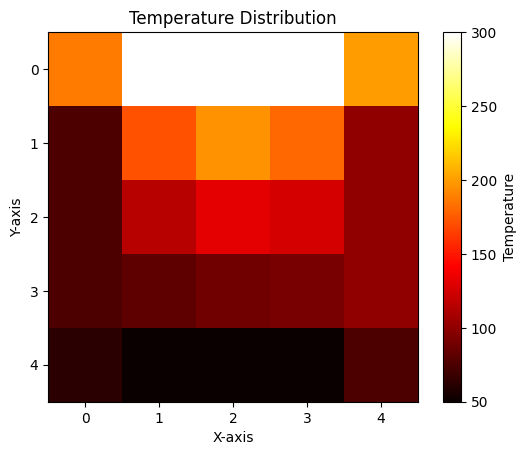

In [32]:
T_grid = T.reshape((ni, nj))
print(T_grid)

plt.imshow(T_grid, cmap='hot', interpolation='nearest')
plt.colorbar(label='Temperature')
plt.title('Temperature Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

<center>
<hr>
<font size="20" color='Blue' >Explicit Method</font>
<hr>
</center>

In [33]:
def gauss_seidel(K, F, tol=1e-10, max_iterations=1000):
    T = np.zeros_like(F)
    for iteration in range(max_iterations):
        T_new = np.copy(T)
        for i in range(K.shape[0]):
            sum1 = np.dot(K[i, :i], T_new[:i])
            sum2 = np.dot(K[i, i+1:], T[i+1:])
            T_new[i] = (F[i] - sum1 - sum2) / K[i, i]
        if np.linalg.norm(T_new - T, ord=np.inf) < tol:
            break
        T = T_new
    return T

T_iterative = gauss_seidel(K, F)
print(T_iterative)

[187.5        300.         300.         300.         200.
  75.         171.42857143 195.75892857 180.35714286 100.
  75.         114.95535714 131.25       125.66964286 100.
  75.          82.14285714  88.61607143  91.07142857 100.
  62.5         50.          50.          50.          75.        ]


[[187.5        300.         300.         300.         200.        ]
 [ 75.         171.42857143 195.75892857 180.35714286 100.        ]
 [ 75.         114.95535714 131.25       125.66964286 100.        ]
 [ 75.          82.14285714  88.61607143  91.07142857 100.        ]
 [ 62.5         50.          50.          50.          75.        ]]


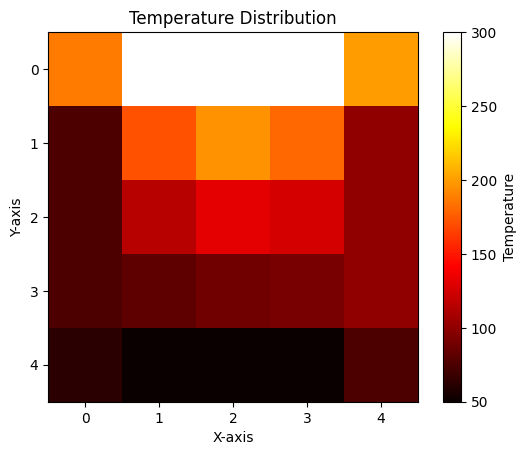

In [34]:
T_grid_iterative = T_iterative.reshape((ni, nj))
print(T_grid_iterative)

plt.imshow(T_grid_iterative, cmap='hot', interpolation='nearest')
plt.colorbar(label='Temperature')
plt.title('Temperature Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()